In [15]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 30 23:51:04 2016

@author: Kevin Joseph
"""

import numpy as np
import pandas as pd
from scipy import stats

def linregDF(x,y):
    
    import numpy as np
    import pandas as pd
    from scipy import stats

    df = pd.DataFrame({'x':x,'y':y,'xy':x*y,'xx':x**2})
    
    bOne=stats.linregress(x,y)[0]
    bnot=stats.linregress(x,y)[1]
    yhat = bnot + bOne*x
    
    df['yhat']=yhat
    df['y-yhat']=df['y']-df['yhat']
    df['y-yhat_squared']=df['y-yhat']**2
    df=df.append(df.sum(),ignore_index=True)
    df = df.rename(index={df.shape[0]-1:'total'}) 
    return df

def SSE(x,y):
    df=linregDF(x,y)
    dex = df.shape[0]-1 # Don't want total row
    return(sum((df.y.iloc[:dex]-df.yhat.iloc[:dex])**2))

def SSR(x,y):
    df=linregDF(x,y)
    dex=df.shape[0]-1
    ybar = df.y[:dex].mean()
    return sum((df.yhat[:dex]-ybar)**2)

def SST(x,y):
    df=linregDF(x,y)
    dex=df.shape[0]-1
    ybar = df.y[:dex].mean()
    return sum((df.y[:dex]-ybar)**2)

def ssqands(x,y):
    import math
    n=len(x)
    ssqands=[SSE(x,y)/(n-2)]
    ssqands.append(math.sqrt(ssqands[0]))
    return ssqands

def printall(x,y):
    DF=linregDF(x,y)
    print(DF)
    print()
    print("Slope:", stats.linregress(x,y)[0])
    print("Intercept:", stats.linregress(x,y)[1])
    print("Xbar:", DF.x.loc['total']/len(x))
    print("Ybar:", DF.y.loc['total']/len(y))
    print("r^2:", stats.linregress(x,y)[2]**2)
    print("SSR:", SSR(x,y))
    print("SSE:", SSE(x,y))
    print("SST:", SST(x,y))
    print("s^2:", ssqands(x,y)[0])
    print("s:", ssqands(x,y)[1])
    
def plotit(DF):
    plt.plot(x,y,'o',label='Original Data',markersize=5)
    plt.plot(DF.drop('total')['x'],DF.drop('total')['yhat'],'-',label='Fitted')
    plt.title('SLR')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    


          x     xx      xy       y         yhat        y-yhat  y-yhat_squared
0       2.0   4.00   504.0   252.0   251.190476  8.095238e-01        0.655329
1       2.2   4.84   536.8   244.0   245.647619 -1.647619e+00        2.714649
2       2.4   5.76   578.4   241.0   240.104762  8.952381e-01        0.801451
3       2.6   6.76   608.4   234.0   234.561905 -5.619048e-01        0.315737
4       2.8   7.84   644.0   230.0   229.019048  9.809524e-01        0.962268
5       3.0   9.00   669.0   223.0   223.476190 -4.761905e-01        0.226757
total  15.0  38.20  3540.6  1424.0  1424.000000 -5.684342e-14        5.676190

Slope: -27.7142857143
Intercept: 306.619047619
Xbar: 2.5
Ybar: 237.333333333
r^2: 0.989553023663
SSR: 537.657142857
SSE: 5.67619047619
SST: 543.333333333
s^2: 1.41904761905
s: 1.1912378515844848


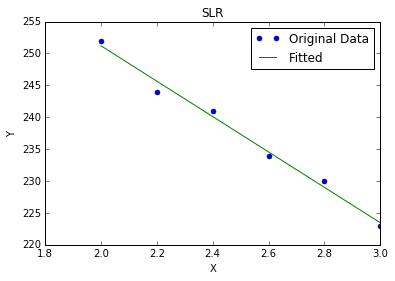

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Question 4.5 Chaot 4 pg 130

x=np.array([2,2.2,2.4,2.6,2.8,3])
y=np.array([252,244,241,234,230,223])
DF = linregDF(x,y)
printall(x,y)
plotit(DF)




           x        xx       xy     y       yhat        y-yhat  y-yhat_squared
0       28.0    784.00   347.20  12.4  12.256049  1.439506e-01        0.020722
1       28.0    784.00   327.60  11.7  12.256049 -5.560494e-01        0.309191
2       32.5   1056.25   403.00  12.4  11.680402  7.195983e-01        0.517822
3       39.0   1521.00   421.20  10.8  10.848911 -4.891053e-02        0.002392
4       45.9   2106.81   431.46   9.4   9.966251 -5.662507e-01        0.320640
5       57.8   3340.84   549.10   9.5   8.443982  1.056018e+00        1.115173
6       58.1   3375.61   464.80   8.0   8.405606 -4.056058e-01        0.164516
7       62.5   3906.25   468.75   7.5   7.842750 -3.427502e-01        0.117478
total  351.8  16874.76  3413.11  81.7  81.700000  2.664535e-15        2.567934

Slope: -0.127921714951
Intercept: 15.837857415
Xbar: 43.975
Ybar: 10.2125
r^2: 0.899488870753
SSR: 22.9808162867
SSE: 2.56793371334
SST: 25.54875
s^2: 0.427988952224
s: 0.6542086457878852


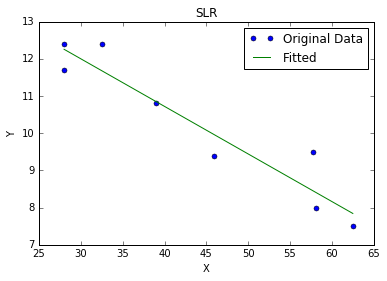

In [17]:
# Table 4.4 chap 4 and example 5.11 pg 177
x = np.array([28,28,32.5,39,45.9,57.8,58.1,62.5])
y = np.array([12.4,11.7,12.4,10.8,9.4,9.5,8.0,7.5])

DF = linregDF(x,y)
printall(x,y)
plotit(DF)

           x       xx       xy      y        yhat        y-yhat  \
0       3.26  10.6276   91.932   28.2   27.834306  3.656945e-01   
1       2.60   6.7600   64.480   24.8   24.697912  1.020877e-01   
2       3.35  11.2225   93.465   27.9   28.261996 -3.619955e-01   
3       2.86   8.1796   72.358   25.3   25.933461 -6.334611e-01   
4       3.82  14.5924  115.746   30.3   30.495488 -1.954877e-01   
5       2.21   4.8841   50.830   23.0   22.844589  1.554110e-01   
6       3.47  12.0409  102.018   29.4   28.832249  5.677511e-01   
total  21.57  68.3071  590.829  188.9  188.900000 -3.197442e-14   

       y-yhat_squared  
0            0.133732  
1            0.010422  
2            0.131041  
3            0.401273  
4            0.038215  
5            0.024153  
6            0.322341  
total        1.061178  

Slope: 4.75211101453
Intercept: 12.3424236309
Xbar: 3.08142857143
Ybar: 26.9857142857
r^2: 0.975106425669
SSR: 41.5673939171
SSE: 1.06117751149
SST: 42.6285714286
s^2: 0.212235502

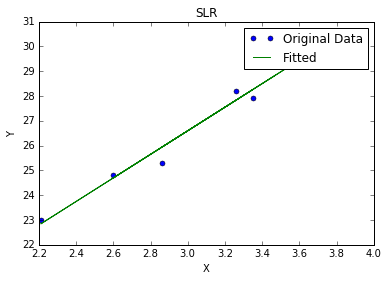

In [18]:
# Chap 5 Q 5.1
x=np.array([3.26,2.60,3.35,2.86,3.82,2.21,3.47])
y=np.array([28.2,24.8,27.9,25.3,30.3,23.0,29.4])
DF = linregDF(x,y)
printall(x,y)
plotit(DF)